In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import WoodCuttingEnv
from agent import PPOAgent
from training import train_ppo_agent, evaluate_ppo_agent

In [3]:
def main():

    train = True 
    evaluate = False
    model_path = 'models/ppo_wood_cutting_final.pth'
    episodes = 1000
    eval_episodes = 100
    platform_width = 100
    platform_height = 100
    max_platforms = 5
    render_every = 100 # Render every N episodes during training
    update_every = 20 # Update policy every N timesteps
    custom_order = False # Run with a custom order example
    
    if custom_order:
        custom_order_example()
        return
    
    # Create environment
    env = WoodCuttingEnv(
        big_platform_size=(platform_width, platform_height),
        max_platforms=max_platforms
    )
    
    # Create PPO agent
    agent = PPOAgent(
        state_shape={
            'grid': env.observation_space['grid'].shape,
            'order': env.observation_space['order'].shape,
            'platform_index': (1,)
        },
        action_space=env.action_space.nvec
    )
    
    if train:
        # Train the agent
        print("Starting training with PPO...")
        train_ppo_agent(
            env=env,
            agent=agent,
            episodes=episodes,
            update_every=update_every,
            render_every=render_every
        )
        print("Training completed!")
    
    if evaluate:
        # Load the model if not training
        if not train:
            print(f"Loading model from {model_path}...")
            agent.load_model(model_path)
        
        # Evaluate the agent
        print("Starting evaluation...")
        evaluate_ppo_agent(
            env=env,
            agent=agent,
            episodes=eval_episodes
        )
        print("Evaluation completed!")

def custom_order_example():
    """Example of using a custom order with PPO agent."""
    # Create environment
    env = WoodCuttingEnv()
    
    # Create and load agent
    agent = PPOAgent(
        state_shape={
            'grid': env.observation_space['grid'].shape,
            'order': env.observation_space['order'].shape,
            'platform_index': (1,)
        },
        action_space=env.action_space.nvec
    )
    
    try:
        agent.load_model('models/ppo_wood_cutting_final.pth')
        print("Loaded trained model")
    except:
        print("No trained model found, using untrained agent")
    
    # Define a custom order
    # Format: [[width, height, quantity], ...]
    custom_order = np.array([
        [30, 20, 5],   # 5 pieces of 30x20
        [25, 15, 8],   # 8 pieces of 25x15
        [40, 10, 3],   # 3 pieces of 40x10
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0]      # Padding
    ])
    
    # Reset environment with custom order
    state = env.reset(order=custom_order)
    
    # Run episode with custom order
    done = False
    total_reward = 0
    steps = 0
    max_steps = 200
    
    print("Starting custom order optimization with PPO...")
    
    while not done and steps < max_steps:
        # Choose action
        action, _, _ = agent.choose_action(state, training=False)
        
        # Take action
        next_state, reward, done, info = env.step(action)
        
        # Update state and total reward
        state = next_state
        total_reward += reward
        steps += 1
        
        if done:
            print(f"Order completed in {steps} steps")
            print(f"Total reward: {total_reward:.2f}")
            if 'waste' in info:
                print(f"Waste: {info['waste']}")
                print(f"Efficiency: {info['efficiency']:.2f}")
                print(f"Platforms used: {info['platforms_used']}")
    
    # Render final state
    env.render()
    
    if not done:
        print(f"Failed to complete order within {max_steps} steps")
    
    return total_reward


Starting training with PPO...


Training:   0%|          | 0/1000 [00:00<?, ?it/s]


Episode 0
Reward: 31495.88
Waste: 8765
Efficiency: 0.78
Platforms used: 4


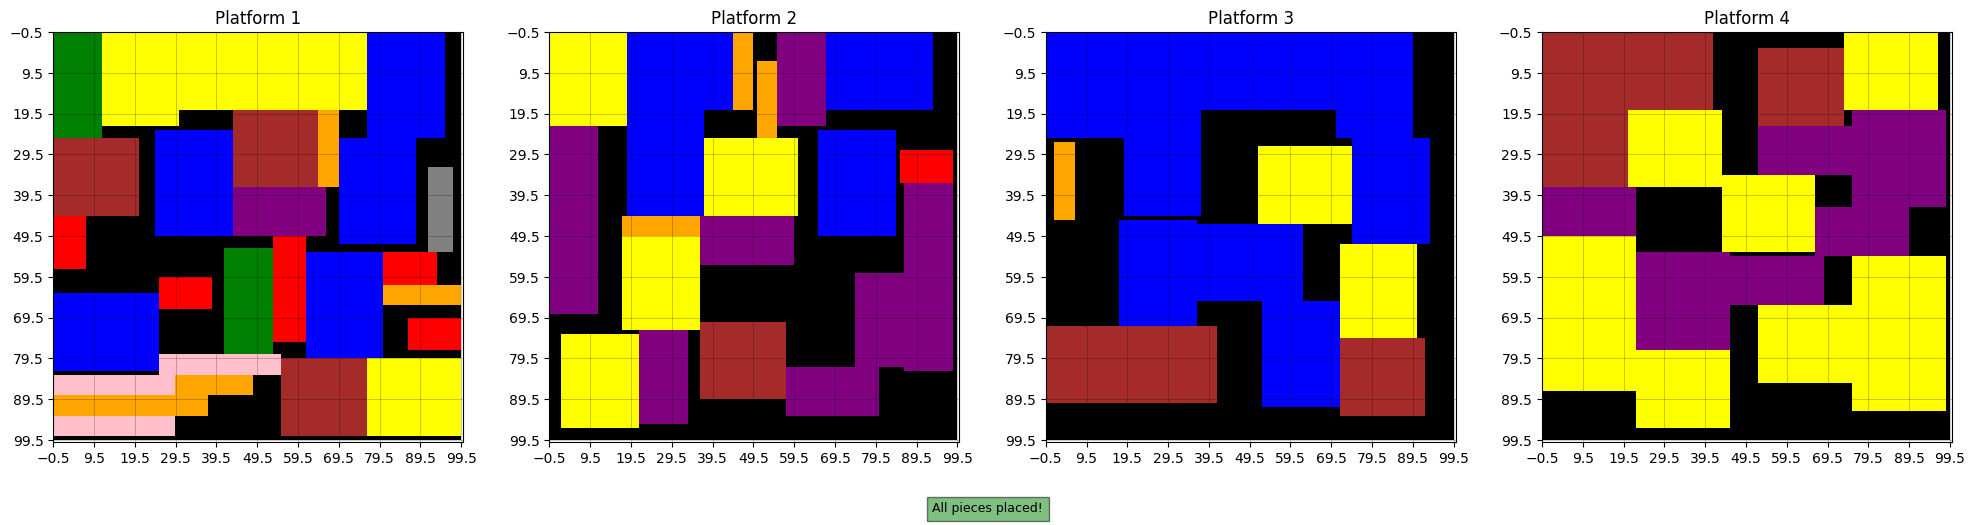

Training:  10%|█         | 100/1000 [07:46<1:23:08,  5.54s/it]


Episode 100
Reward: 8215.00
Waste: 2400
Efficiency: 0.76
Platforms used: 1


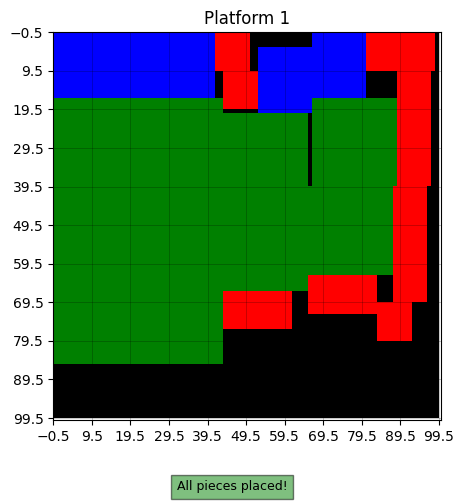

Training:  20%|██        | 200/1000 [14:53<43:11,  3.24s/it]  


Episode 200
Reward: 32128.42
Waste: 8143
Efficiency: 0.80
Platforms used: 4


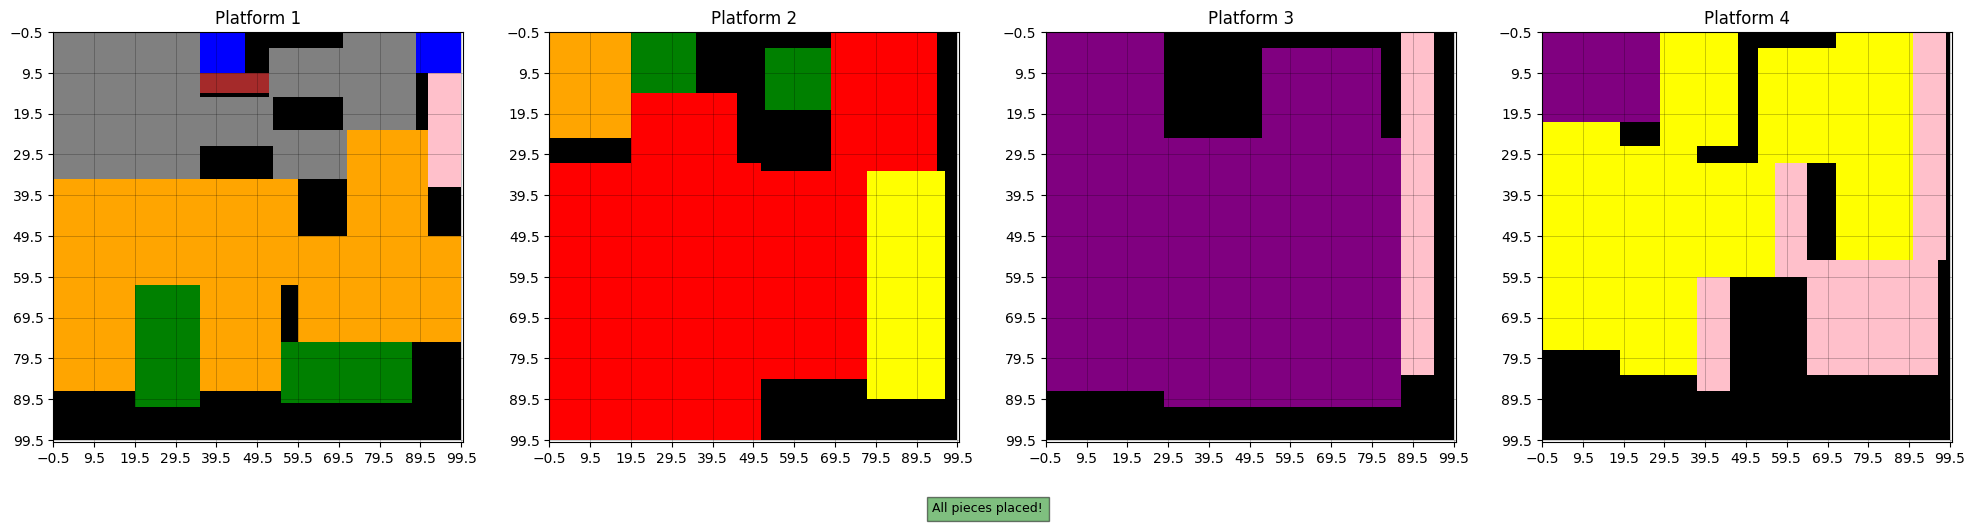

Training:  30%|███       | 300/1000 [22:57<1:00:48,  5.21s/it]


Episode 300
Reward: 15129.50
Waste: 5310
Efficiency: 0.73
Platforms used: 2


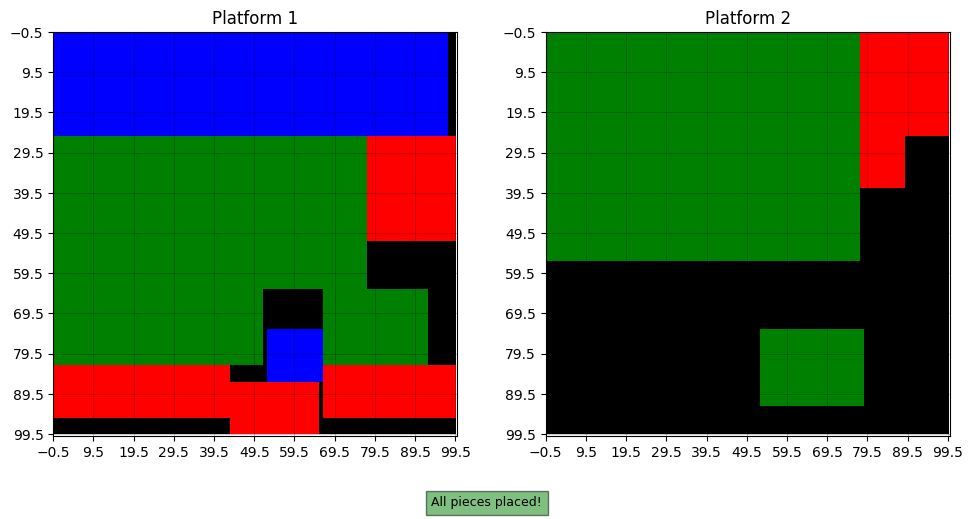

Training:  40%|████      | 400/1000 [31:08<1:18:47,  7.88s/it]


Episode 400
Reward: 4409.80
Waste: 5932
Efficiency: 0.41
Platforms used: 1


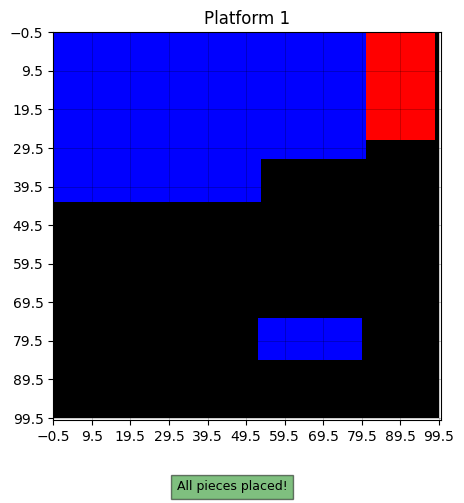

Training:  50%|█████     | 500/1000 [39:40<19:37,  2.36s/it]  


Episode 500
Reward: 13108.10
Waste: 7178
Efficiency: 0.64
Platforms used: 2


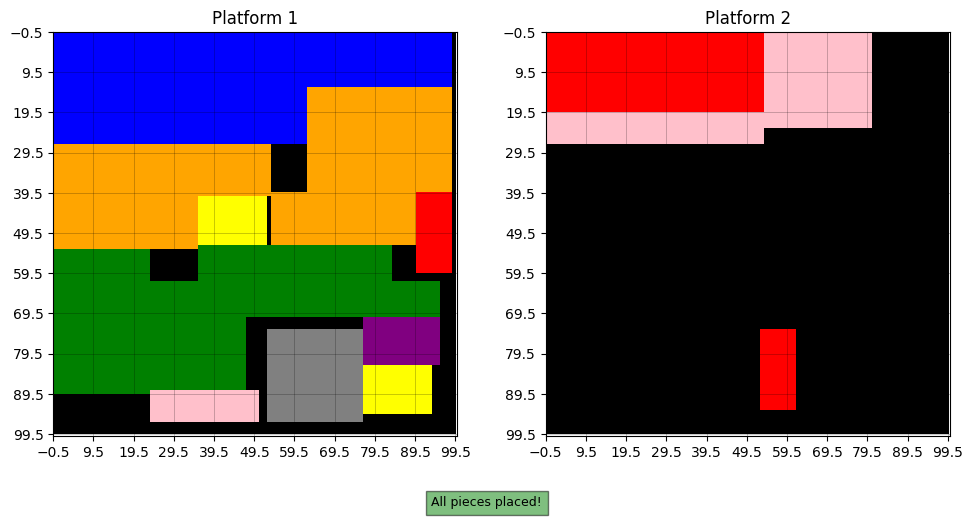

Training:  60%|██████    | 600/1000 [46:00<23:28,  3.52s/it]  


Episode 600
Reward: 10089.65
Waste: 10167
Efficiency: 0.49
Platforms used: 2


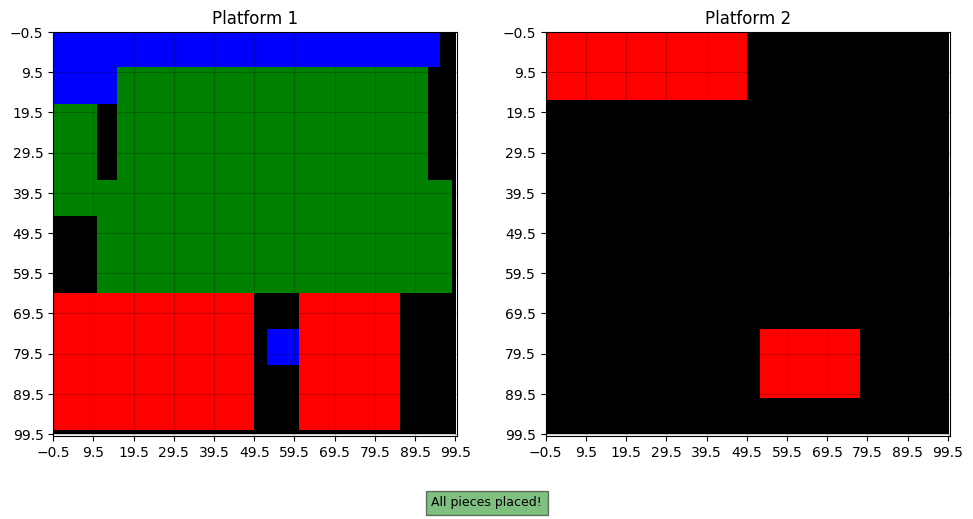

Training:  70%|███████   | 700/1000 [52:35<10:31,  2.10s/it]


Episode 700
Reward: 17530.83
Waste: 12725
Efficiency: 0.58
Platforms used: 3


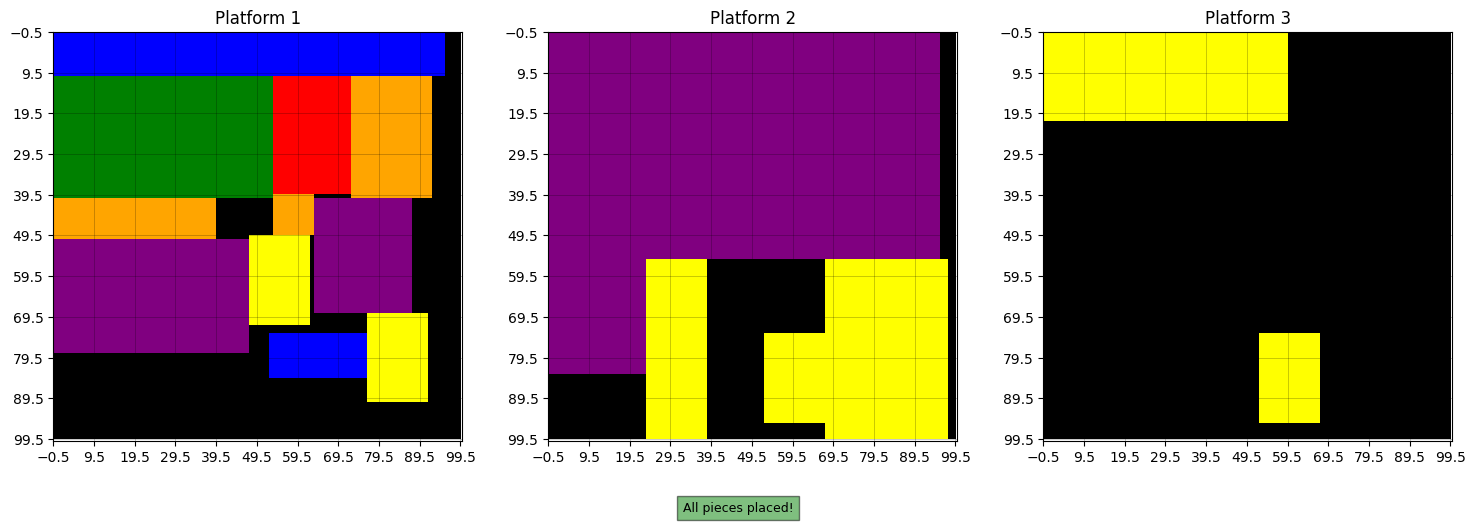

Training:  80%|████████  | 800/1000 [59:52<10:54,  3.27s/it]


Episode 800
Reward: 26579.43
Waste: 3707
Efficiency: 0.88
Platforms used: 3


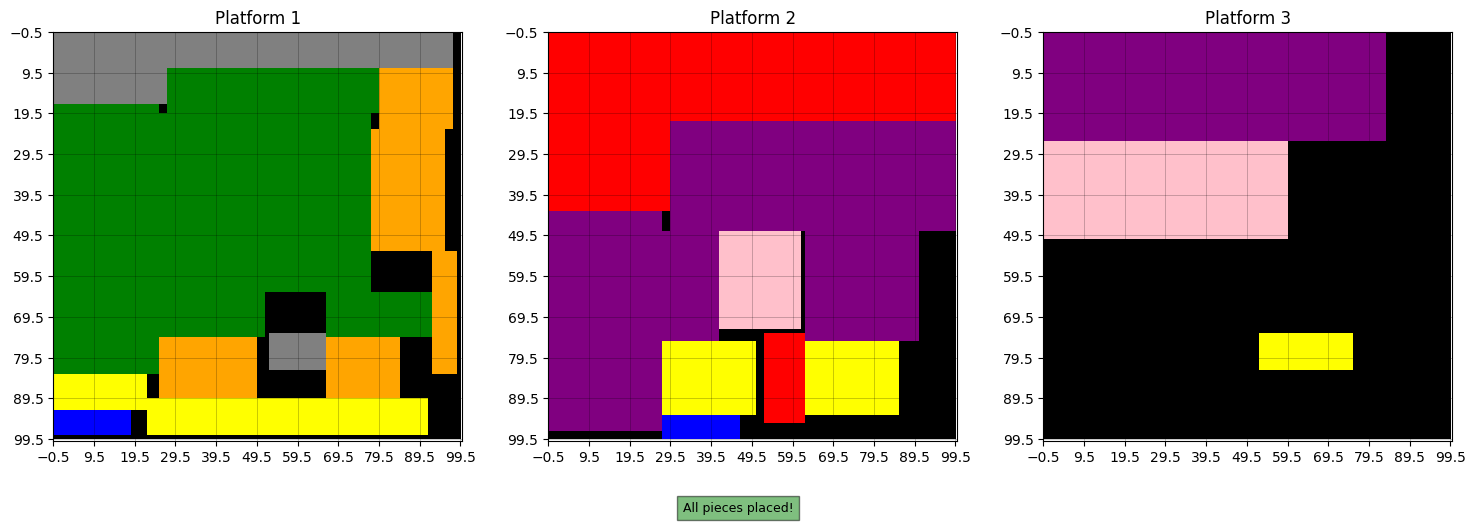

Training:  90%|█████████ | 900/1000 [1:08:40<10:15,  6.15s/it]


Episode 900
Reward: 14127.30
Waste: 6274
Efficiency: 0.69
Platforms used: 2


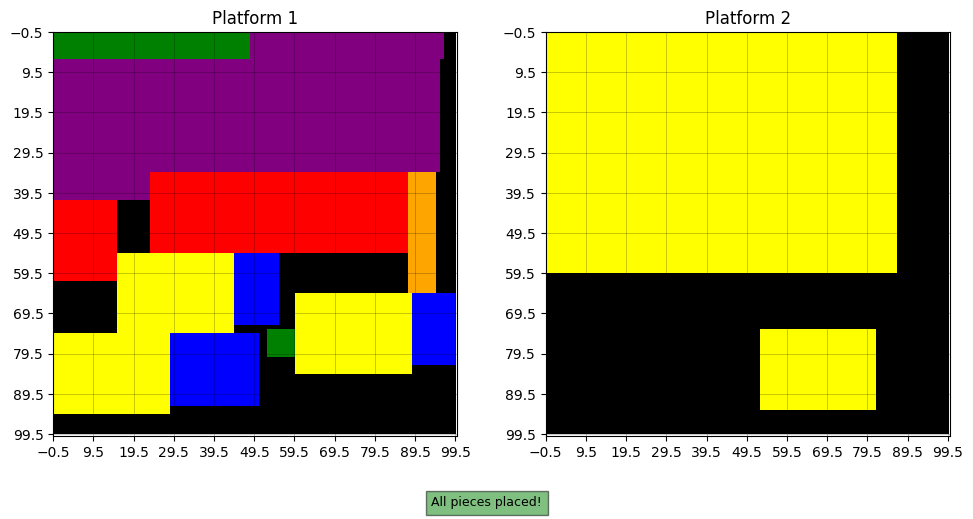

Training: 100%|██████████| 1000/1000 [1:15:50<00:00,  4.55s/it]


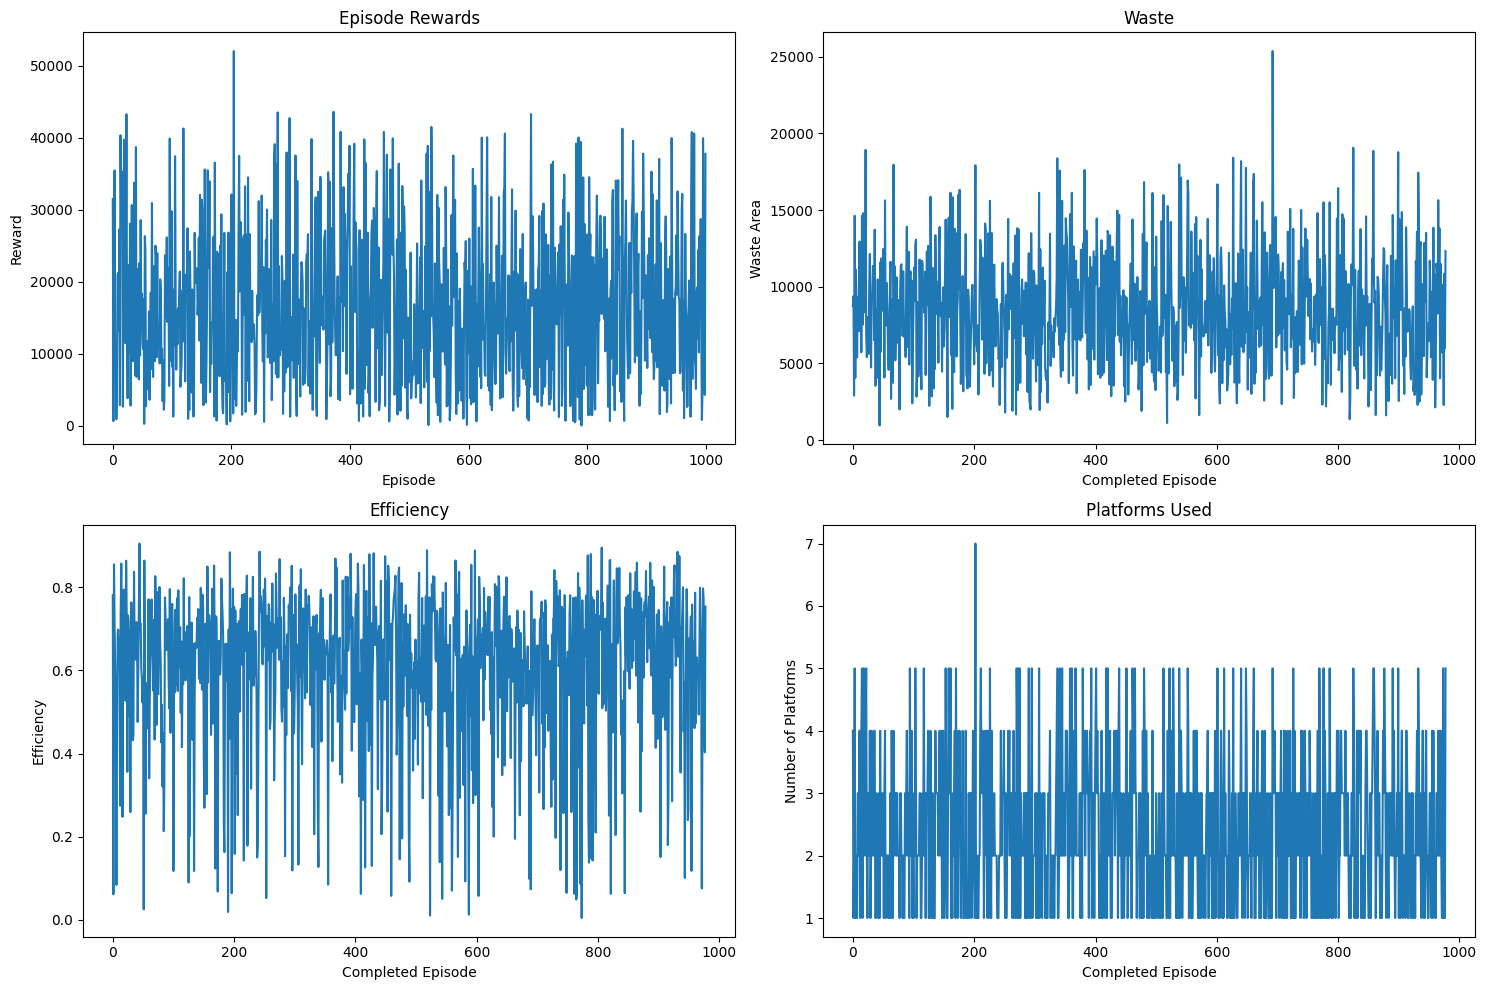

Training completed!


In [4]:
main()